# RGB分量，全图片，聚类

In [2]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2

box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1] - 10:box[3] + 10, box[0]:box[2] + 10]
cv2.imwrite('origin.jpg', src)
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2Lab)
img = src
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
# for i in range(len(res)):
#     if res[i].all() == center[0].all():
#         res[i] = [255,0,0]
#     if res[i].all() == center[1].all():
#         res[i] = [0,255,0]
#     if res[i].all() == center[2].all():
#         res[i] = [0,0,255]
res2 = res.reshape(img.shape)
dst = cv2.applyColorMap(res2, cv2.COLORMAP_RAINBOW)
print(center)
# blur = cv2.GaussianBlur(res2, (5, 5), 0)
# res3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('res2', res2)
cv2.imshow('res2_', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]
[259, 313, 295, 370]
[[172 118 151]
 [134 122 150]
 [ 94 127 146]
 [ 47 131 140]]


In [59]:
src[src.shape[0]//2]

array([[ 77, 139, 113],
       [ 80, 139, 113],
       [ 80, 138, 115],
       [ 71, 137, 116],
       [ 69, 137, 116],
       [ 86, 136, 116],
       [100, 136, 116],
       [ 99, 137, 116],
       [ 89, 137, 116],
       [ 76, 137, 116],
       [ 65, 137, 115],
       [ 54, 138, 116],
       [ 39, 137, 117],
       [ 29, 134, 118],
       [ 37, 132, 117],
       [ 63, 132, 114],
       [ 84, 132, 111],
       [ 86, 129, 108],
       [ 85, 127, 105],
       [ 91, 126, 105],
       [ 99, 125, 104],
       [106, 125, 103],
       [115, 124, 101],
       [121, 125, 101],
       [127, 127, 101],
       [123, 129, 102],
       [100, 133, 104],
       [ 76, 138, 107],
       [ 76, 142, 106],
       [ 96, 145, 105],
       [121, 147, 105],
       [141, 147, 106],
       [150, 145, 105],
       [131, 144, 107],
       [ 95, 144, 108],
       [ 63, 144, 108],
       [ 48, 143, 110],
       [ 58, 142, 111],
       [ 77, 141, 111],
       [ 79, 139, 111],
       [ 65, 138, 111],
       [ 54, 137

# RGB分量，部分图片，聚类

In [5]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test9.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_0.5mnet.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src_show = src[box[1]:box[3], box[0]:box[2] + 10]
src = src[box[1]:box[3], box[0]:box[2] + 10]
# src = src[src.shape[0]//3:2*src.shape[0]//3]
# _range = np.max(src[0]) - np.min(src[0])
# src[0] = (src[0] - np.min(src[0])) / _range
# _range = np.max(src[1]) - np.min(src[1])
# src[1] = (src[1] - np.min(src[1])) / _range
# _range = np.max(src[2]) - np.min(src[2])
# src[2] = (src[2] - np.min(src[2])) / _range
norms = np.linalg.norm(src[0])
src[0] = src[0]/norms
norms = np.linalg.norm(src[1])
src[1] = src[1]/norms
norms = np.linalg.norm(src[2])
src[2] = src[2]/norms
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
img_show = cv2.applyColorMap(img_show, cv2.COLORMAP_RAINBOW)
cv2.imshow('origin', src_show)
cv2.imshow('show', img_show)
# plt.imshow('show', img_show)
# plt.imshow('src', src[src.shape[0]//3:2*src.shape[0]//3])
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.75390625 0.6484375  0.40234375 0.19140625 0.19140625 0.16796875
 0.140625   0.1171875  0.08984375 0.08203125]
[['pepper', 297, 1, 618, 316], ['root', 423, 264, 447, 325]]
[423, 264, 447, 325]
[[ 38  77 104]
 [ 13  49  70]
 [  0   3   6]]


# K-Means聚类实例

In [6]:
import numpy as np
import cv2
src = cv2.imread('img/littleduck.jpg')
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
img = src
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)
dst = cv2.applyColorMap(res2, cv2.COLORMAP_RAINBOW)
print(center)
# blur = cv2.GaussianBlur(res2, (5, 5), 0)
# res3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('res2', res2)
cv2.imshow('res2_', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(3.4.7) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('img/test1.jpg')
imgplot = plt.imshow(img)

In [40]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_0.5mnet.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src1 = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src1, cv2.COLOR_BGR2Lab)
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
# dst = cv2.applyColorMap(img_show, cv2.COLORMAP_SPRING)
dst = img_show
cv2.imshow('src', src1)
cv2.imwrite('src.jpg',src1)
cv2.imshow('res2_', dst)
cv2.imwrite('result.jpg',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.77734375 0.6484375  0.24609375 0.1796875  0.1328125  0.1328125
 0.1328125  0.12109375 0.1171875  0.1171875 ]
[['pepper', 72, 10, 440, 368], ['root', 269, 321, 294, 372]]
[269, 321, 294, 372]
[[101 124 149]
 [ 49 131 140]
 [141 122 151]]


[0.77734375 0.6484375  0.24609375 0.1796875  0.1328125  0.1328125
 0.1328125  0.12109375 0.1171875  0.1171875 ]
[['pepper', 72, 10, 440, 368], ['root', 269, 321, 294, 372]]
[269, 321, 294, 372]
[[ 63 132 143]
 [159 126 149]
 [130 120 152]
 [ 98 124 150]
 [ 39 130 139]]


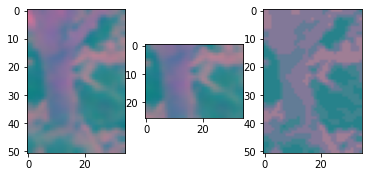

In [44]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_0.5mnet.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2Lab)
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
cv2.imwrite('result.jpg',img_show)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(src)
ax = fig.add_subplot(1, 3, 2)
src = src[src.shape[0]//4:3*src.shape[0]//4]
imgplot = plt.imshow(src)
ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_show)

In [8]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
files = os.listdir('img')
for file in files:
    print(file)
    box = []
    image_path = 'img/' + file
    class_path = 'pepper_class.txt'
    model_path = 'pepper_detect_2cat_0.5mnet.tflite'
    result = tflite_image_detection(class_path, model_path, image_path)
    print(result)
    for i in range(len(result)):
        if str(result[i][0]) == 'root':
            box = result[i]
            box.remove(box[0])
    # box = [259, 313, 295, 370]
    src = cv2.imread(image_path)
    src = src[box[1]:box[3] + 5, box[0]:box[2] ]
    src = cv2.GaussianBlur(src, (3, 3), 1)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    img = src
    Z = src.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    imgHSV = img
    # lower = np.array([14, 150, 40])
    lower = np.array(center.min(0), dtype='int32')
    upper = np.array([255, 255, 255])
    # 获得指定颜色范围内的掩码
    mask = cv2.inRange(imgHSV, lower, upper)
    # 对原图图像进行按位与的操作，掩码区域保留
    imgResult = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow("origin", cv2.cvtColor(src, cv2.COLOR_HSV2BGR))
    cv2.imshow("Mask", mask)
    #显示分割后的图像
    cv2.imshow("Result", imgResult)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

rgb22.jpg
[0.72265625 0.6953125  0.1875     0.171875   0.140625   0.125
 0.125      0.12109375 0.1015625  0.1015625 ]
[['root', 475, 267, 502, 326], ['pepper', 304, 1, 630, 317]]
rgb23.jpg
[0.77734375 0.74609375 0.32421875 0.24609375 0.24609375 0.23046875
 0.21484375 0.1796875  0.171875   0.1484375 ]
[['root', 404, 290, 429, 344], ['pepper', 233, 1, 585, 347]]
test1.jpg
[0.77734375 0.6484375  0.24609375 0.1796875  0.1328125  0.1328125
 0.1328125  0.12109375 0.1171875  0.1171875 ]
[['pepper', 72, 10, 440, 368], ['root', 269, 321, 294, 372]]
test5.jpg
[0.8515625  0.77734375 0.42578125 0.19140625 0.125      0.125
 0.109375   0.10546875 0.08984375 0.0859375 ]
[['pepper', 255, 138, 537, 404], ['root', 347, 365, 373, 407]]
test6.jpg
[0.75390625 0.60546875 0.24609375 0.21484375 0.1796875  0.16796875
 0.12890625 0.125      0.08984375 0.08984375]
[['pepper', 203, 1, 572, 322], ['root', 356, 260, 384, 325]]
test7.jpg
[0.79296875 0.77734375 0.15625    0.1171875  0.10546875 0.09375
 0.08984375 0.0

In [3]:
center.min(0)

array([ 18, 166,  72], dtype=uint8)

In [4]:
import os
files = os.listdir('img')
for file in files:
    print(file)

03.jpg
04.jpg
05.jpg
littleduck.jpg
phone46_640.jpg
phone48_640.jpg
phone72_640.jpg
phone74_640.jpg
phone76_640.jpg
phone78_640.jpg
test1.jpg
test5.jpg


In [8]:
src[0]

array([[0.13333334, 0.19607843, 0.19215687],
       [0.26666668, 0.31764707, 0.3254902 ],
       [0.04313726, 0.10196079, 0.10980392],
       [0.03921569, 0.1254902 , 0.11764706],
       [0.09803922, 0.21176471, 0.2       ],
       [0.26666668, 0.40392157, 0.3882353 ],
       [0.21960784, 0.39215687, 0.3647059 ],
       [0.14117648, 0.34509805, 0.30588236],
       [0.10588235, 0.3254902 , 0.27450982],
       [0.06666667, 0.29803923, 0.23921569],
       [0.11372549, 0.34509805, 0.28627452],
       [0.11372549, 0.34509805, 0.28627452],
       [0.14117648, 0.3764706 , 0.30588236],
       [0.20392157, 0.44313726, 0.3647059 ],
       [0.25882354, 0.49019608, 0.4117647 ],
       [0.2784314 , 0.49019608, 0.4392157 ],
       [0.09803922, 0.29411766, 0.2784314 ],
       [0.39607844, 0.5568628 , 0.5921569 ],
       [0.59607846, 0.7372549 , 0.80784315],
       [0.5686275 , 0.69803923, 0.7764706 ],
       [0.49019608, 0.627451  , 0.7058824 ],
       [0.3019608 , 0.44313726, 0.5137255 ],
       [0.